In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from scipy.special import expit as g				#Sigmoid Function

In [2]:

#########################################################################################
#Reading data into matrices X, y
def readFile(filename):
	datafile = open(filename,'r')
	lines	 = datafile.readlines()
	m		 = len(lines)
	n		 = len(lines[0].split(','))
	X		 = np.ones((m,n), order='F', dtype='float64')
	y		 = np.ones((m,1), order='F', dtype='float64')
	for i in range(0,m):
		s			= lines[i].split(',')
		for j in range(len(s)-1):
			X[i][j+1] 	= float(s[j])
		y[i]		= s[-1].rstrip()
	return [X,y,m,n]
[X,y,m,n]=readFile("ex2data1.txt")

########################################################################################
#Calculating Cost Function
def costFunction(features,target,weights):
	prediction =np.array(g(features.__matmul__(weights)))
	I=np.ones((m,1),order='F')
	cost_function=(-1)*(target.T.__matmul__(np.log(prediction)) + (I-target).T.__matmul__(np.log(I-prediction)))/m
	return cost_function

theta_ini=np.zeros((n,1))

#######################################################################################
#Training Gradient DEscent ------- Passed
def trainGradientDescent(features,target,num_steps,learning_rate,add_intercept=False):
	if add_intercept:
		intercept=np.ones((features.shape[0],1))
		features =np.hstack([intercept,features])

	weights = np.zeros((features.shape[1],1))

	for step in range(int(num_steps)):
		score = np.matmul(features,weights)
		hypothesis = g(score)

		output_error_signal= target - hypothesis
		gradient = np.matmul(features.T,output_error_signal)
		weights += (learning_rate)*gradient
	return weights

print("Optimum Theta by Gradient Descent is :",trainGradientDescent(X,y,900000,5e-5))
print("Minimized Cost Function by GD 	 is :",costFunction(X,y,trainGradientDescent(X,y,900000,5e-5).reshape(3,1)))



########################################################################################
#Using Library Methods
regression=LogisticRegression(penalty='l2',solver='lbfgs',C=1e15,fit_intercept=False)
regression.fit(X,y.reshape(m))
print("Optimum Theta by Library method is :",regression.coef_)
print("Minimized Cost Function by LM   is :",costFunction(X,y,regression.coef_.reshape(3,1)))



Optimum Theta by Gradient Descent is : [[-29.9957439 ]
 [  0.25565616]
 [  0.24972642]]
Minimized Cost Function by GD 	 is : [[0.24428338]]
Optimum Theta by Library method is : [[-25.16138567   0.20623222   0.20147191]]
Minimized Cost Function by LM   is : [[0.2034977]]


<IPython.core.display.Javascript object>


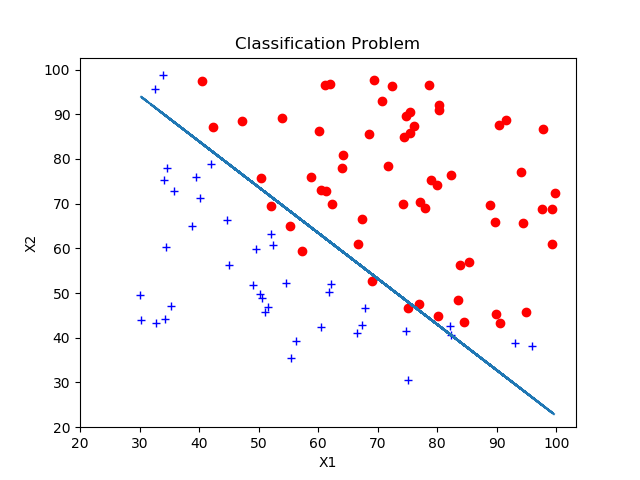

In [3]:
##################################################################################
#Plotting the Graphs

x1=np.array([X[i][1] for i in range(m)])
x2=(-regression.coef_[0][0] - regression.coef_[0][1]*x1.reshape(m,1))/regression.coef_[0][2]
plt.figure()
for i in range(m):
	if y[i]==1:
		plt.plot([X[i][1]],[X[i][2]],'ro')
	elif y[i]==0:
		plt.plot([X[i][1]],[X[i][2]],'b+')
plt.plot(x1,x2,'--')
plt.xlim(20)
plt.ylim(20)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("Classification Problem")
plt.show()